# Analyze RNA velocity for mouse hippocampal dentate gyrus neurogenesis data

This tutorial shows how to analyze RNA velocity using cellDancer, including: (1) model estimation, (2) deriving cell fates in embedding level, and (3) pseudotime estimation.
 

Below is the case study for the mouse hippocampal dentate gyrus neurogenesis data, we followed the preprocessing methods of [La Manno et al.](https://www.nature.com/articles/s41587-020-0591-3) to filter genes and cells. 18,140 cells with 2,159 genes were selected.

## Import packages

To run the notebook locally, [Installation](installation.html) could be referred to install the environment and dependencies.

In [1]:
# import packages
import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt
import celldancer as cd
import celldancer.plotting as cdplt
from celldancer.plotting import colormap

## Load mouse hippocampal dentate gyrus neurogenesis data

The input data for cellDancer contains the abundances of unspliced RNA and spliced RNA. For the detail of obtaining the dataset and pre-processing, please refer to [Data Preparation](data_preparation.html).

The data of mouse hippocampal dentate gyrus neurogenesis could be downloaded from [DentateGyrus_cell_type_u_s.csv](http:xxx/xxx/DentateGyrus_cell_type_u_s.csv). It could be loaded by ```pandas.read_csv('your_path/DentateGyrus_cell_type_u_s.csv')```. To load your own data, the dataframe should contain columns 'gene_name', 'unsplice', 'splice' ,'cellID' ,'clusters' ,'embedding1' , and 'embedding2.' For a detailed description of the data structure, [Data Preparation](data_preparation.html) could be referred to.

In [2]:
cell_type_u_s_path="your_path/DentateGyrus_cell_type_u_s.csv"
cell_type_u_s=pd.read_csv(cell_type_u_s_path)
cell_type_u_s

,gene_name,unsplice,splice,cellID,clusters,embedding1,embedding2
0,Rgs20,0.069478,0.021971,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429
1,Rgs20,0.085834,0.016256,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895
2,Rgs20,0.068644,0.047774,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419
3,Rgs20,0.045387,0.018101,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485
4,Rgs20,0.040457,0.012846,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900
...,...,...,...,...,...,...,...
39164255,Gpm6b,0.876650,1.276089,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668
39164256,Gpm6b,2.024897,5.152006,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788
39164257,Gpm6b,1.848051,1.491445,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364
39164258,Gpm6b,0.696361,1.189091,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549


## Velocity estimation of sample genes

```celldancer.velocity_estimation.velocity()``` could be used to estimate the velocity. 

Here, 30 genes in ```gene_list``` will be estimated as an example. By default, the Deep Neural Network (DNN) will be trained at most 200 epochs. It will check the loss every 10 epochs. If the loss has no improvement in 3 checked epochs, the epoch will be ended, and the network at that time will be used for the estimation. If supported by equipment, parallel computing could be used to improve the speed, ```n_jobs``` could be adjusted according to demand.

After fitting, the predicted unspliced and spliced reads, alpha, beta, and gamma will be added to the original dataframe and returned.

In [3]:
gene_list=['Psd3', 'Dcx', 'Syt11', 'Diaph3', 'Slc1a3', 'Gria1', 'Dctn3', 'Map1b', 'Camk2a', 'Gpm6b', 'Sez6l', 'Evl', 'Astn1', 'Ank2', 'Klf7', 'Tbc1d16', 'Atp1a3', 'Stxbp6', 'Scn2a1', 'Lhx9', 'Slc4a4', 'Ppfia2', 'Kcnip1', 'Ptpro', 'Ntrk2', 'Gnao1', 'Cadm1', 'Mef2c', 'Sptbn1', 'Ncald']

loss_df, cellDancer_df=cd.velocity_estimation.velocity(cell_type_u_s,\
                                                       gene_list=gene_list,\
                                                       permutation_ratio=0.1,\
                                                       norm_u_s=False,\
                                                       norm_cell_distribution=False,
                                                       n_jobs=8)
cellDancer_df

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cellDancer_velocity_2022-06-15 09-05-11 as the output path.
Arranging genes for parallel job.
30  genes were arranged to  4  portions.



Velocity Estimation: 100%|██████████| 4/4 [01:38<00:00, 22.18s/it]                                                                                              
                                                                                                                                                                

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Klf7,0.408467,1.294797,0.444935,1.475828,0.454905,0.935128,0.015373,0.077489,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429
1,1,Klf7,0.379136,1.256870,0.411796,1.424216,0.419835,0.935061,0.015772,0.077489,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895
2,2,Klf7,0.893599,3.395004,0.969404,3.832591,1.033540,0.986942,0.001990,0.077489,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419
3,3,Klf7,0.640505,2.739187,0.669036,3.047821,0.684626,0.979797,0.003759,0.077489,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485
4,4,Klf7,0.662303,2.433943,0.712970,2.749427,0.745024,0.971894,0.005226,0.077489,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544195,18135,Kcnip1,0.018745,0.005679,0.243844,0.008779,0.463909,0.731405,1.322285,0.079982,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668
544196,18136,Kcnip1,0.148039,0.093618,0.380534,0.085685,0.572677,0.727422,1.319759,0.079982,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788
544197,18137,Kcnip1,0.080708,0.032079,0.312729,0.040230,0.522807,0.728119,1.323665,0.079982,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364
544198,18138,Kcnip1,0.078976,0.033418,0.310343,0.040067,0.520257,0.728360,1.323348,0.079982,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549


## Visualization of sample genes' prediction

Let’s visualize the predicted results pf each gene with ```celldancer.plotting.gene.scatter_gene()```.

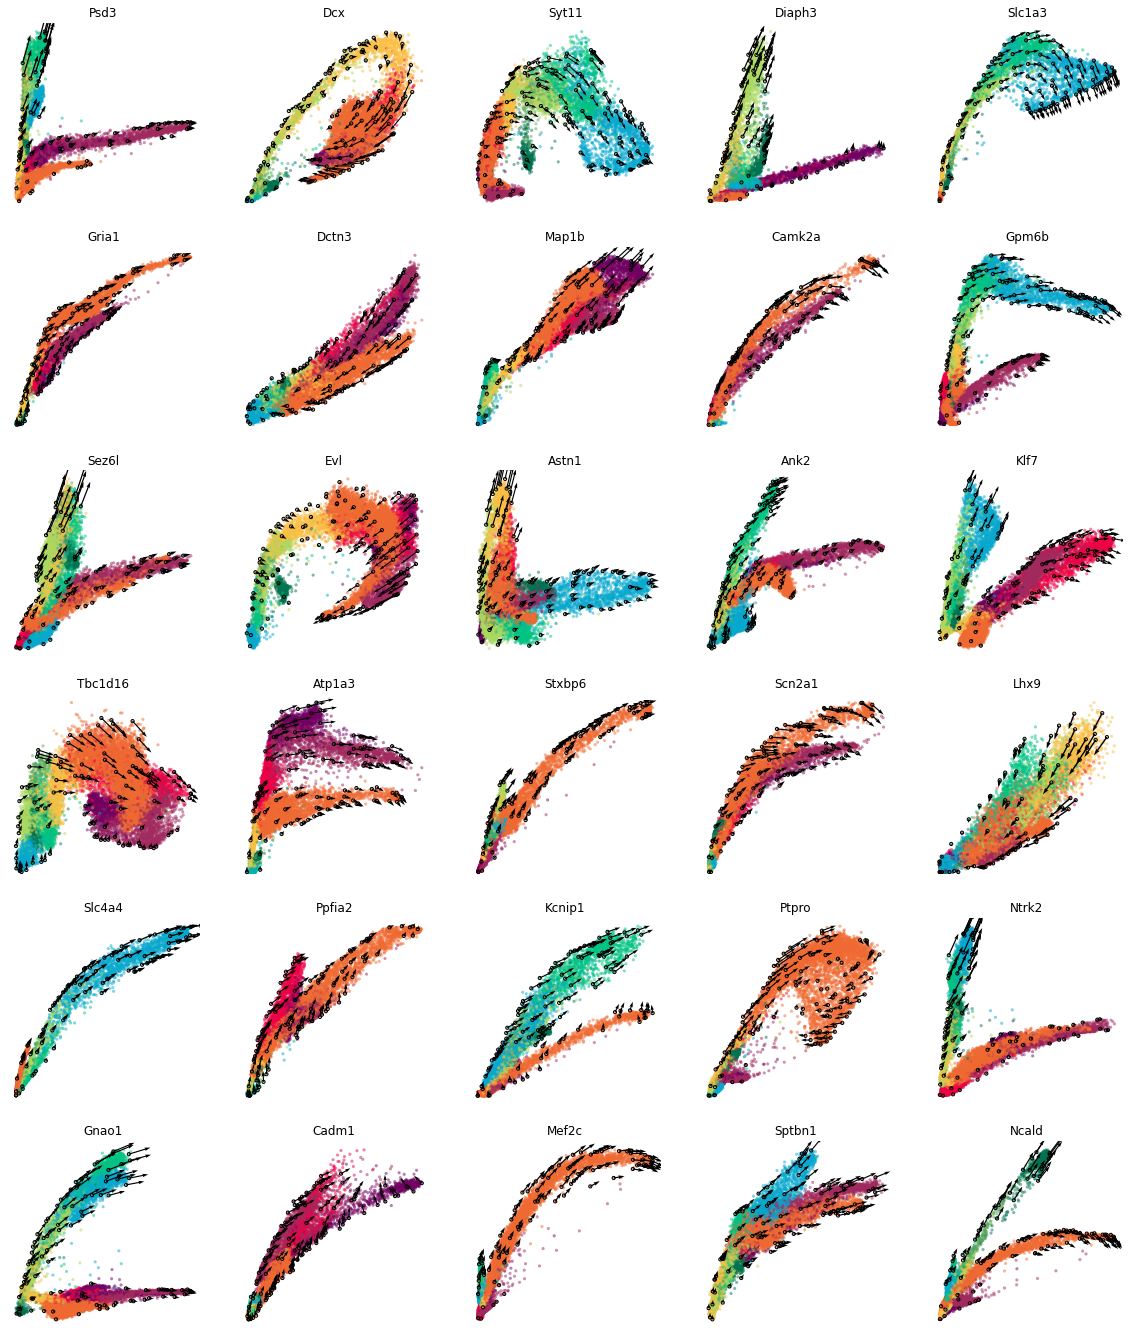

In [4]:
ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 10,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## Load the velocity estimation result of all 2,159 genes

To display the prediction in embedding space and to estimate pseudotime by using all genes, all the 2,159 genes have already been predicted and could be downloaded from [DentateGyrus_cellDancer_estimation.csv](link). The csv file could be loaded by ```pandas.read_csv()```.

In [5]:
# load the prediction result of all genes
cellDancer_df_file = 'your_path/DentateGyrus_cellDancer_estimation.csv'
cellDancer_df=pd.read_csv(cellDancer_df_file)

## Coumpute and visualize the prediction in embedding space

The prediction in the embedding space could be calculated with ```celldancer.compute_cell_velocity.compute()```. If not specified, all genes in cellDancer_df will be used to calculate the prediction in the embedding space. Following the method of [velocyto](https://velocyto.org/velocyto.py/index.html#) and [scVelo](https://scvelo.readthedocs.io/), we project the velocity vectors of the cells into the low-dimensional embedding space.

After the calculation, the predicted direction in the embedding space, i.e. columns 'velocity1' and 'velocity2' will be added to the original dataframe. ```celldancer.plotting.cell.scatter_cell()``` could be used to display the predicted direction in embedding space.

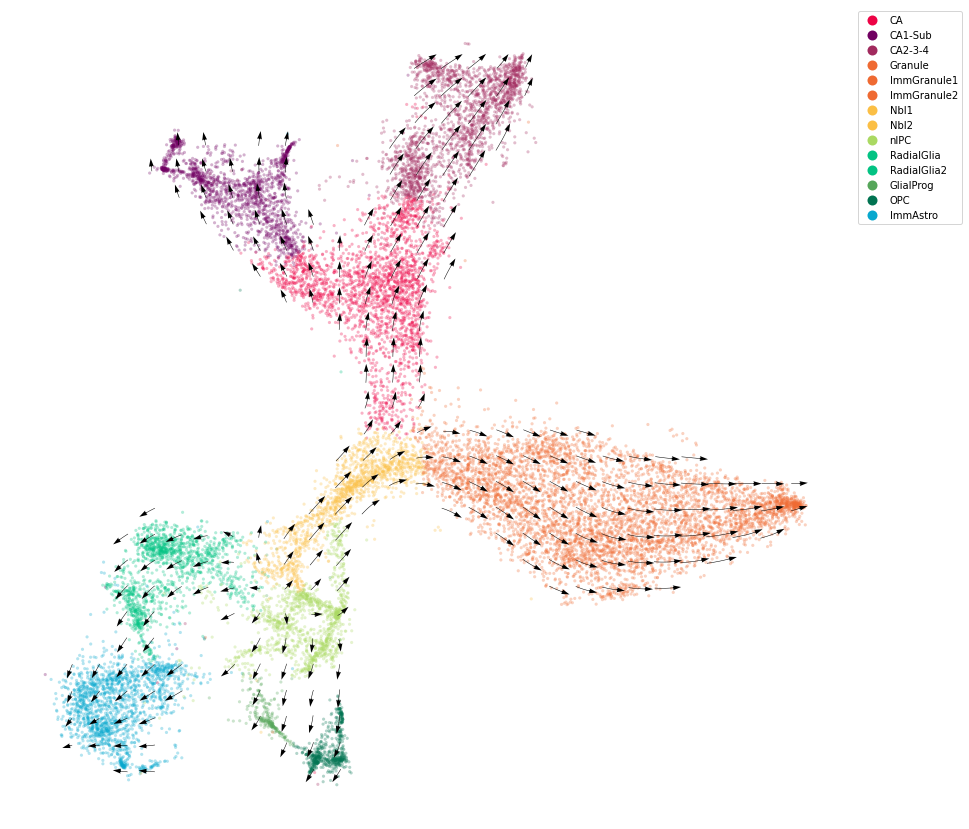

In [6]:
# compute cell velocity
cellDancer_df=cd.compute_cell_velocity.compute(cellDancer_df=cellDancer_df)

# plot cell velocity
fig, ax = plt.subplots(figsize=(15,15))
im = cdplt.cell.scatter_cell(ax,cellDancer_df, colors=colormap.colormap_neuro, alpha=0.3, s=10,
             velocity=True, legend='on',min_mass=2,arrow_grid=(30,30))
ax.axis('off')
plt.show()

## Estimate pseudotime

Based on the prediction in embedding space, the pseudotime could be estimated with ```celldancer.pseudo_time.pseudo_time()```.

In [7]:
%%capture

# set parameters
dt = 0.001
t_total = {dt: 10000}
n_repeats = 10

# estimate pseudotime
cellDancer_df = cd.pseudo_time.pseudo_time(cellDancer_df=cellDancer_df, 
                                          grid=(30, 30), 
                                          dt=dt, 
                                          t_total=t_total[dt],
                                          n_repeats=n_repeats,
                                          speed_up=(60,60),
                                          n_paths = 5,
                                          psrng_seeds_diffusion=[i for i in range(n_repeats)],
                                          activate_umap_paths_divider=False,
                                          n_jobs=8)

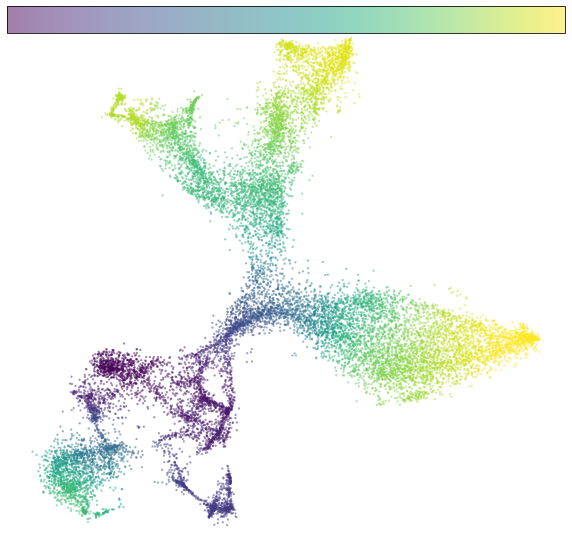

In [8]:
# plot pseudotime
fig, ax = plt.subplots(figsize=(10,10))
im=cdplt.cell.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=0.5, velocity=False)
ax.axis('off')
plt.show()

The connection network below is another way to display pseudotime. The edge lengths indicate the time difference between nodes (the closer in pseudotime, the shorter the edge length). The sizes of the nodes are proportional to the 
pseudotime.

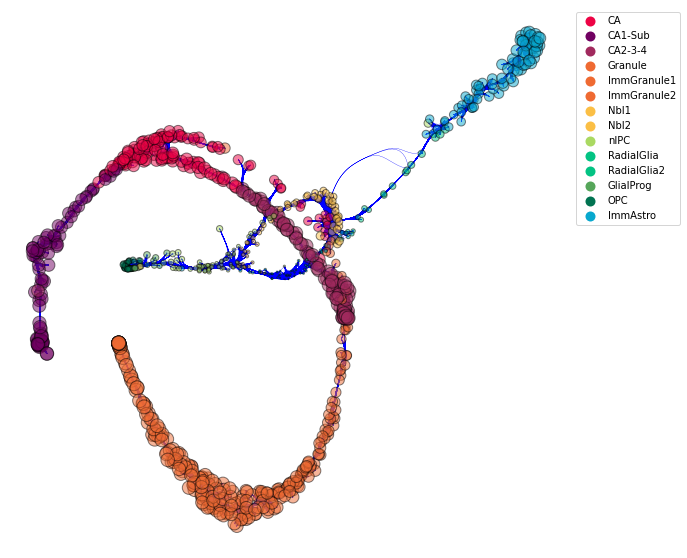

In [12]:
fig, ax= plt.subplots(figsize=(10,10))

cdplt.graph.graph(ax,
                  cellDancer_df,
                  node_layout='forcedirected',
                  use_edge_bundling=True,
                  node_colors=colormap.colormap_neuro,
                  edge_length=3,
                  node_sizes='pseudotime',
                  colorbar='on',
                  legend='on')

### Pseudotime of gene

Let’s visualize the spliced RNA abundance of some sample genes based on pseudotime with ```celldancer.plotting.gene.scatter_gene()```.

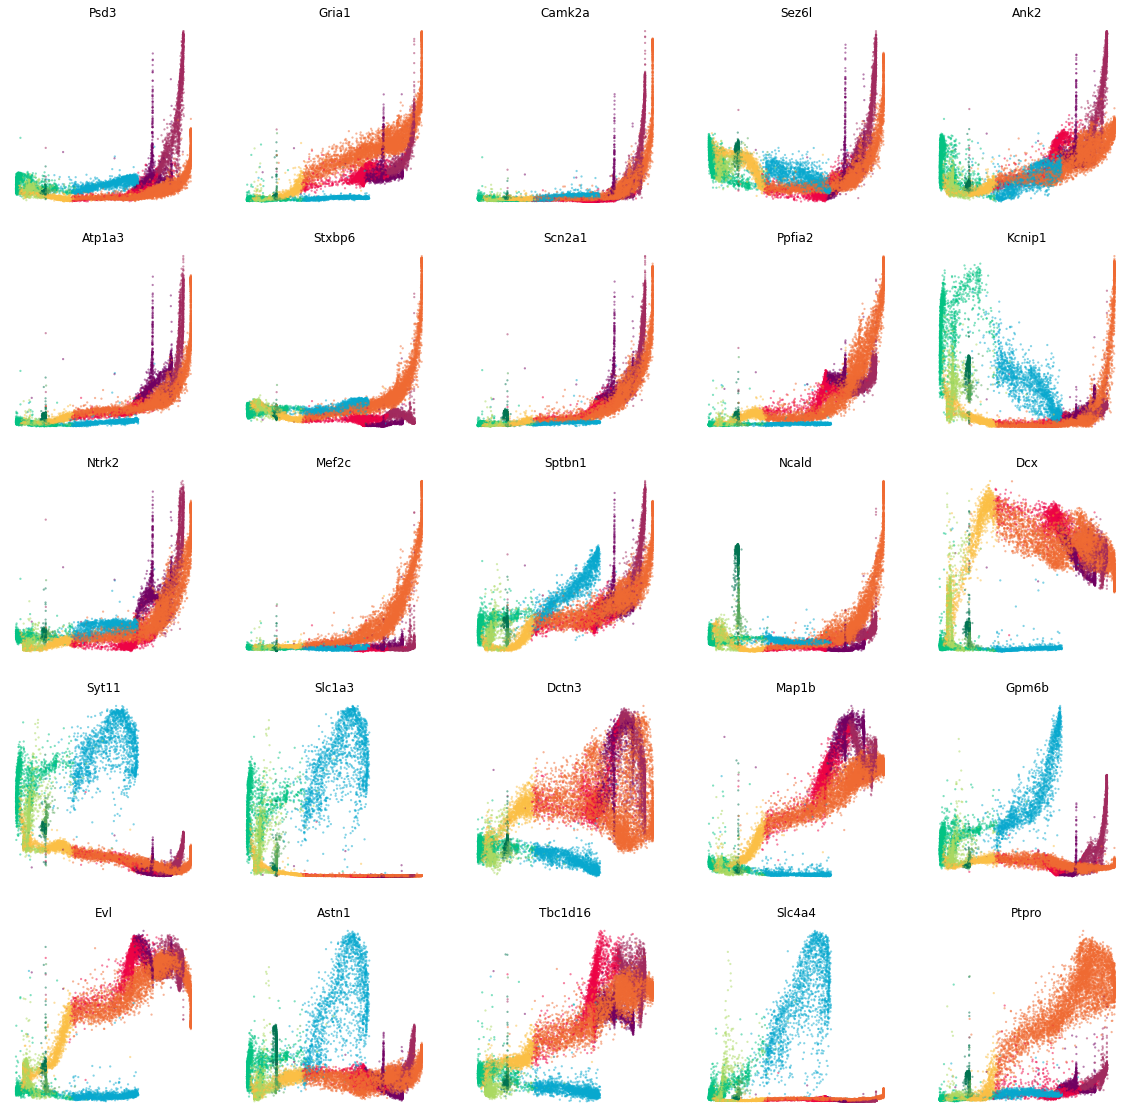

In [10]:
gene_list=['Psd3', 'Gria1', 'Camk2a', 'Sez6l', 'Ank2', 'Atp1a3', 'Stxbp6', 'Scn2a1', 'Ppfia2', 'Kcnip1', 'Ntrk2', 'Mef2c', 'Sptbn1', 'Ncald','Dcx', 'Syt11','Slc1a3', 'Dctn3', 'Map1b', 'Gpm6b', 'Evl', 'Astn1', 'Tbc1d16','Slc4a4', 'Ptpro']

ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

## Kinetics in embedding space

cellDancer provides other functions for visualization. In embedding space, we could visualize the alpha, beta, gamma, spliced reads, and unspliced reads with ```celldancer.plotting.cell.scatter_cell()```. The specific genes could be analyzed based on the kinetics' plot. Taking Ntrk2 as an example, the high alpha and low beta in astrocytes and OPCs is resulting in high expression of unspliced Ntrk2. The high beta and low gamma in dentate gyrus granule neurons and pyramidal neurons is resulting in high expression of spliced Ntrk2.

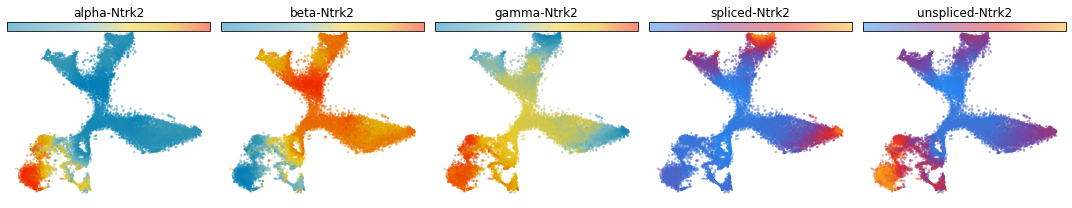

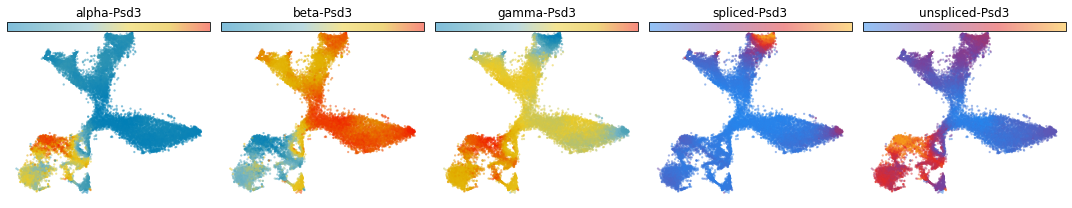

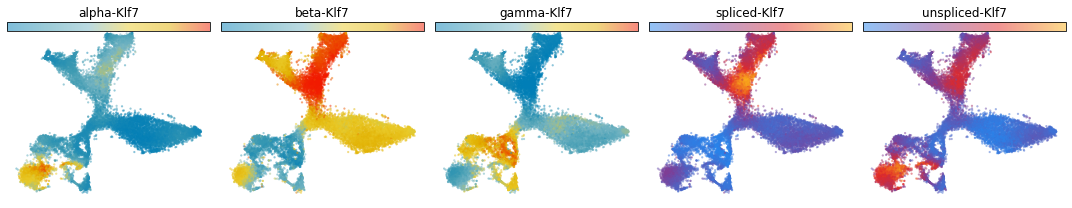

In [11]:
gene_samples=['Ntrk2','Psd3','Klf7']

for gene in gene_samples:
    fig, ax = plt.subplots(ncols=5, figsize=(15,3))
    cdplt.cell.scatter_cell(ax[0],cellDancer_df, colors='alpha', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[1],cellDancer_df, colors='beta', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[2],cellDancer_df, colors='gamma', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[3],cellDancer_df, colors='splice', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[4],cellDancer_df, colors='unsplice', 
                 gene=gene, velocity=False)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    ax[4].axis('off')
    ax[0].set_title('alpha-'+gene)
    ax[1].set_title('beta-'+gene)
    ax[2].set_title('gamma-'+gene)
    ax[3].set_title('spliced-'+gene)
    ax[4].set_title('unspliced-'+gene)
    plt.tight_layout()
    plt.show()